# Data Intelligence - [BBDAINT1KU]
|Student A|aaa@itu.dk|26/05-2021|
|-----------|-----------|-----------|

## Introduction
Throughout human history, vast amounts of data have been collected and stored. It is not until recently, however, that the immense value that can be generated from the data has been recognised. Thus, buzzwords like big data, AI, and data analysis have appeared, and now makes up a billion dollar industry (Provost & Fawcett, 2013). This report will be in line with this trend, and aim at making some sense from a simple dataset, seemingly stemming from a sharing economy housing site, in line with AirBnb. Firstly, the framework will be outlined, with an introduction to the used libraries with regards to their capabilities and their application in the analysis. This will be followed by an initial description of the data at hand, including information such as the format and the contents of the dataset. Hereafter, some visualisations of parts of the data will be provided, primarily to portray the data, and thus provide an initial understanding of selected parts of the data. This aforementioned part will provide the insights required to enable some data cleaning, where unnecessary columns can be dropped, in order to simplify the dataset. Then, two hypotheses will be formulated and presented, which then will be analysed and eventually evaluated upon. Subsequently, a third hypothesis will be proposed, finally leading to a discussion of the findings. Conclusively, the insights provided by this report will be presented, showcasing the knowledge generated by analysis of the dataset.

## Libraries


### pandas
Pandas is short for Python Data Analysis Library, and it is an effective and time efficient software library written for the Python programming language. It's primary purpose is data manipulation in order to make data cleaning and analysis relatively simple. Furthermore, pandas is often used in connection to analytical libraries such as scikit-learn and data visualisation tools such as matplotlib and seaborn (this report is no exception). Furthermore, pandas is one of the most popular tools in data wrangling, probably partly due to it being open source and free to use. One of the eye-catching features of pandas is its ability to take a CSV-file or SQL database and create dataframes - a Python object with rows and columns similar to a table in Microsoft Excel (McKinney, 2017).


### Matplotlib & Seaborn
In order to perform visualisatons of the data, the Matplotlib and Seaborn libraries will be made use of. The firstmentioned is a plotting library, which in particular has its capabilities in the Python programming language in its numerical mathematics extension known as Numpy (as will elaborated on below). In short, this enables the data to be plotted throught the use of general-purpose graphical user interface (GUI) toolkits. The second visualisation library Seaborn is based on Matplotlib, as well enabling the making of statistical graphs (McKinney, 2017; Matplotlib, 2021). By utilising said libraries, it is possible to visualise the manipulated data, which will allow me to reach some meaning and implications of the data in question.


### Sklearn & Numpy
With the purpose of performing calculations along with manipulating data Numpy will be utilised. That is due to the fact that Numpy supports complex arrays for which it offers comprehensive mathematical functions, which are helpful to handle these arrays. Hence, utilisation of Numpy is beneficial to this report in that it eases the processing of the dataset with regards to performing calculations on it (Numpy, 2021). In continuation hereof, the scikit-learn library is an effective and simple tool for predictive data analysis, and will thus be used to train and test a model. Additionally, scikit-learn is also compliant with Numpy, and thus along with its many capabilities in the fields of classification, regression, and clustering is a very potent tool (Scikit-learn, 2021; McKinney, 2017). 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn.linear_model
import sklearn.ensemble
import sklearn.metrics

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Data 
The first step of making the data available for analysis is loading the data. As the file name suggests and as can be seen from opening the file in a data reader, the data in question is currently stored in a comma-separated value (CSV) file. Since is comma-delimited, it is possible to load the data utilising the pd.read_csv function, from where it can be loaded into a dataframe, as done below (McKinney, 2017). 

In [96]:
def load_data():
    return pd.read_csv("rentals.csv")

## Description of the data

In [97]:
df = load_data()

Given the data contains information such as "host_id", "number_of_reviews", "last_review", and "reviews_per_month", it is presumably gathered utilising an API, due to this data being unlikely to be found on the rental site. Hence, it is unlikely that the data can be collected through use of web scraping. This data seems to stem from a database, and thus it is probably collected using an API (Moslem, 2017; Kumar, 2019). 

As can be seen from using the df.head() function, it is evident that the dataset contains 16 columns in total, namely "id", "name", "host_id", "host_name", "neighbourhood_group", "neighbourhood", "latitude", "longitude", "room_type", "price", "minimum_nights", "number_of_reviews", "last_review", "reviews_per_month", "calculated_host_listings_count", and "availability_365". 

Furthermore, by using the df.into() function, it is evident that there are 48895 rows, with some instances missing, as indicated by the "NaN" value. While "name" and "host_name" miss only a few data entries, other columns like "last_reivew" and "reviews_per_month" miss more than 10.000 entries. Finally, it tells us that there are three data types in the dataset, namely integers, floats, and objects.

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

### Visualisations
The following section will visualise parts of the data, to achieve a preunderstanding of some of the data, although only scratching the surface of the many facets in the dataset.


Below, part of the data has been visualised, portraying the count of the five entires of "Brooklyn", "Manhattan", "Queens", "Staten Island", and "Bronx". The x-axis shows the neighbourhood group and the y-axis shows the count. This is done to show the distribution of the listings in terms of what neighbourhood group they belong to. While this is not done with a specific purpose other than getting acquinted with the dataset, it provides some value in understanding the dataset, portraying that the vast majority of the listings er located on Manhattan or in Brooklyn. The reason a countplot was used for this is that it can visualise the relationship between a numerical and a categorical variable (Grant, 2019).

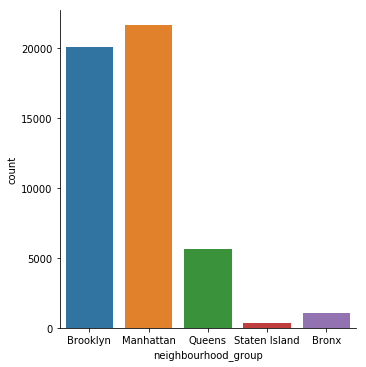

In [9]:
sns.catplot(x="neighbourhood_group", kind="count", data=df)    

The following visualisation shows the counts of entries in the "number_of_reviews" represented by bars. While it is difficult to read the exact counts at the given point without zooming in, the general trend can be seen without zooming in. Again, this is done with the purpose of getting acquainted with the data, and thus get some preunderstanding prior to the analysis. This is done using an sns catplot, because these show the counts of observations in each categorical bin using bars (Grant, 2019)

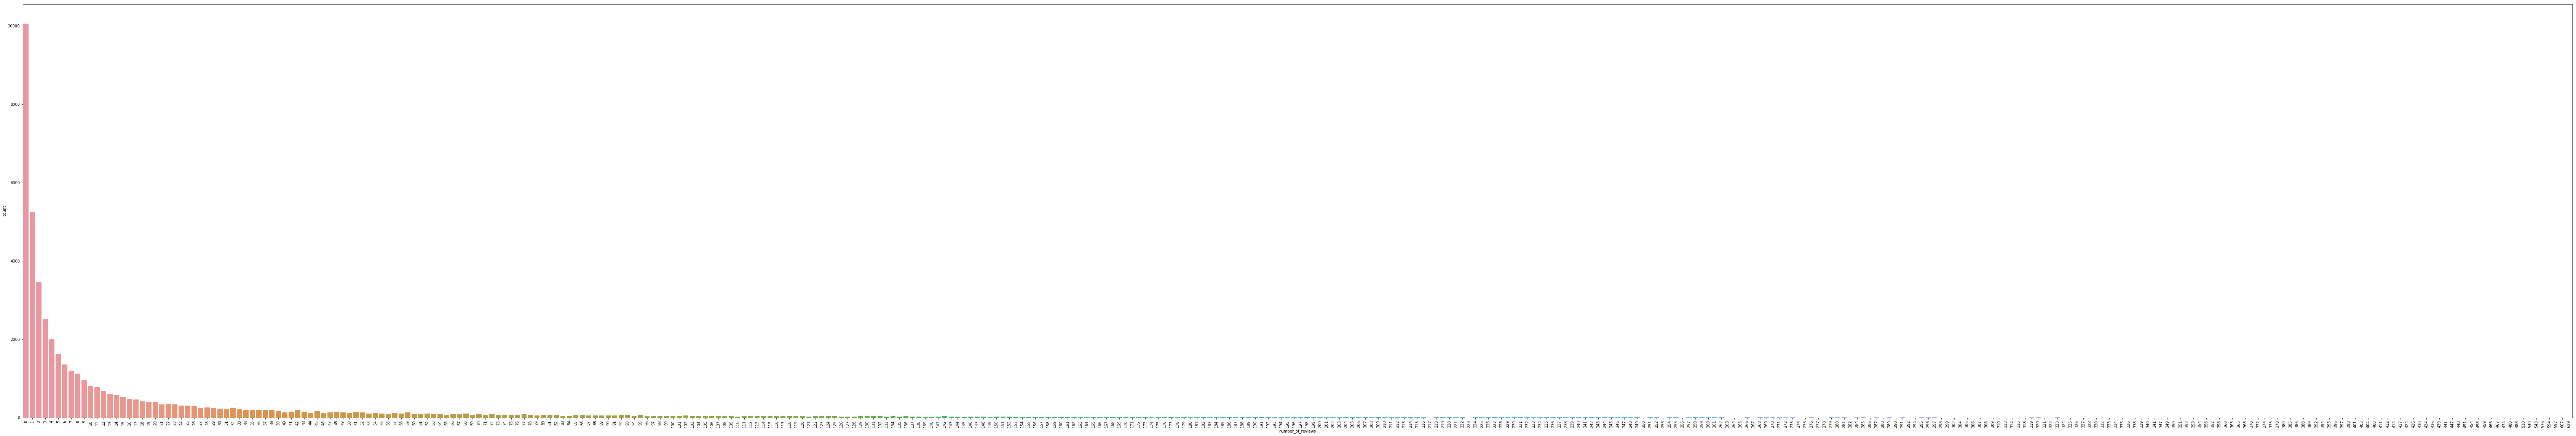

In [10]:
fig_dimensions = (120, 20)
fig, ax = plt.subplots(figsize=fig_dimensions)
plt.xticks(rotation=90)
sns.countplot(x="number_of_reviews", ax = ax, data = df)

### Cleaning the data

Initially, I have chosen to remove the columns "id", "name", "host_id", "host_name", "neighbourhood", "latitude", "longitude", "number_of_reviews", "last_review", "reviews_per_month", and "calculated_host_listings_count". The reason I chose to do this is that these columns contain data that seems irrelevant to the analysis I expect to perform. This information is regarding very specific topics, as e.g., "id" contains the unique id of the specific rental listing, and the "host_name" showing the name of the host seems irrelevant, and thus I will not be including that in any analysis. Finally, I chose to disregard the column "neighbourhood", due to the fact that this contains very specific information about a wide range of neighbourhoods, where "neighbourhood_group", containing information on the wider area the apartment/room is listed in, is relatively more applicable.

In [100]:
columns_to_delete = ["id", "name", "host_id", "host_name", "neighbourhood", "latitude", "longitude", "number_of_reviews", "last_review", "reviews_per_month", "calculated_host_listings_count"]
def clean_data(dataframe, column):
    return dataframe.drop(dataframe[column], axis=1, inplace=True)    

In [101]:
clean_data(df, columns_to_delete)

In [102]:
df.head()

,neighbourhood_group,room_type,price,minimum_nights,availability_365
0,Brooklyn,Private room,149,1,365
1,Manhattan,Entire home/apt,225,1,355
2,Manhattan,Private room,150,3,365
3,Brooklyn,Entire home/apt,89,1,194
4,Manhattan,Entire home/apt,80,10,0


The data has now been cleaned to a satisfactory extend, as the aforementioned columns have been dropped due to them being insignificant in the coming analysis. In addition, the missing entries were in these columns, thus there currently are no missing values. This means that the data now is clean and available for analysis, as the new dataframe shows in the above.

# Analysis
In the following section, the data will be analysed. Initially, two hypotheses will be formulated, whereafter, the data will be analysed to either confirm or reject the hypotheses. This will be evaluated in the consecutive section after the analysis.

## Hypotheses
I hypothesise that there is a connection between the price of the listing and the neighbourhood group it belongs to, and the between the price and the room type. This is based on the presumptions that location and room type are significant factors in determining the pricing. Thus, the relationship between the price and the remaining values will be analysed upon, to identify if there is a connection. 

Concretely, my hypotheses are as follows:
H1: "There is a connection between the price of the listing and the neighbourhood group it belongs to".
H2: "There is a connection between the price of the listing and the type of room it is". 

### The connection between price and neighbourhood group
In the following section, the connection between price and neighbourhood group will be analysed upon. For this particular purpose, I will split the dataset into 5 sets, divided by the neighbourhood group, in order to calculate the average price in the various neighbourhood groups.

#### Brooklyn
Now, the average price for a listing in Brooklyn will be calculated.

In [103]:
brooklyn = df[df.neighbourhood_group == "Brooklyn"]
brooklyn = brooklyn.reset_index(drop=True)
brooklyn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20104 entries, 0 to 20103
Data columns (total 5 columns):
neighbourhood_group    20104 non-null object
room_type              20104 non-null object
price                  20104 non-null int64
minimum_nights         20104 non-null int64
availability_365       20104 non-null int64
dtypes: int64(3), object(2)
memory usage: 785.4+ KB


In [104]:
brooklyn.mean()

price               124.383207
minimum_nights        6.056556
availability_365    100.232292
dtype: float64

#### Manhattan
Below, the average price for a listing on Manhattan will be identified.

In [31]:
manhattan = df[df.neighbourhood_group == "Manhattan"]
manhattan = manhattan.reset_index(drop=True)
manhattan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21661 entries, 0 to 21660
Data columns (total 5 columns):
neighbourhood_group    21661 non-null object
room_type              21661 non-null object
price                  21661 non-null int64
minimum_nights         21661 non-null int64
availability_365       21661 non-null int64
dtypes: int64(3), object(2)
memory usage: 846.2+ KB


In [32]:
manhattan.mean()

price               196.875814
minimum_nights        8.579151
availability_365    111.979410
dtype: float64

#### Queens
The average price of a listing in Queens will be found below.

In [33]:
queens = df[df.neighbourhood_group == "Queens"]
queens = queens.reset_index(drop=True)
queens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5666 entries, 0 to 5665
Data columns (total 5 columns):
neighbourhood_group    5666 non-null object
room_type              5666 non-null object
price                  5666 non-null int64
minimum_nights         5666 non-null int64
availability_365       5666 non-null int64
dtypes: int64(3), object(2)
memory usage: 221.4+ KB


In [34]:
queens.mean()

price                99.517649
minimum_nights        5.181433
availability_365    144.451818
dtype: float64

#### Staten Island
Below, the average price for a listing on Staten Island will be calculated.

In [35]:
staten_island = df[df.neighbourhood_group == "Staten Island"]
staten_island = staten_island.reset_index(drop=True)
staten_island.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 5 columns):
neighbourhood_group    373 non-null object
room_type              373 non-null object
price                  373 non-null int64
minimum_nights         373 non-null int64
availability_365       373 non-null int64
dtypes: int64(3), object(2)
memory usage: 14.6+ KB


In [36]:
staten_island.mean()

price               114.812332
minimum_nights        4.831099
availability_365    199.678284
dtype: float64

#### Bronx
Now, the average price for a listing in Bronx will be calculated.

In [37]:
bronx = df[df.neighbourhood_group == "Bronx"]
bronx = bronx.reset_index(drop=True)
bronx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 5 columns):
neighbourhood_group    1091 non-null object
room_type              1091 non-null object
price                  1091 non-null int64
minimum_nights         1091 non-null int64
availability_365       1091 non-null int64
dtypes: int64(3), object(2)
memory usage: 42.7+ KB


In [38]:
bronx.mean()

price                87.496792
minimum_nights        4.560953
availability_365    165.758937
dtype: float64

#### Findings
So, by splitting the dataset into all the neighbourhood groups and then calculating the mean price enables a simple way of comparing the average price of the listings according to the neighbourhoods.
To sum up the results, they are as follows:
Brooklyn: 124.38, 
Manhattan: 196.88, 
Queens: 99.52, 
Staten Island: 113.81, and
Bronx: 87.5.

Ultimately, some overall tendencies regarding the prices are now evident. Conclusively, the prices are significantly higher on Manhattan than the remaining, with Brooklyn being second most expensive, and then Staten Island, Queens, and finally Bronx following with a smaller difference. 

### The connection between price and room type
In the following section, the connection between price and room type will be analysed upon. For this particular purpose, I will split the original dataset into 3 sets, divided into private room, entire home/apartment, and shared room, in order to calculate the average price in the various room types.

#### Private room
Below, the average price for a private room will be identified.

In [51]:
private_room = df[df.room_type == "Private room"]
private_room = private_room.reset_index(drop=True)
private_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22326 entries, 0 to 22325
Data columns (total 5 columns):
neighbourhood_group    22326 non-null object
room_type              22326 non-null object
price                  22326 non-null int64
minimum_nights         22326 non-null int64
availability_365       22326 non-null int64
dtypes: int64(3), object(2)
memory usage: 872.2+ KB


In [52]:
private_room.mean()

price                89.780973
minimum_nights        5.377900
availability_365    111.203933
dtype: float64

#### Entire home/apt
In the following, the average price for the listings of entire homes/apartments will be identified.

In [54]:
entire_home_apt = df[df.room_type == "Entire home/apt"]
entire_home_apt = entire_home_apt.reset_index(drop=True)
entire_home_apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25409 entries, 0 to 25408
Data columns (total 5 columns):
neighbourhood_group    25409 non-null object
room_type              25409 non-null object
price                  25409 non-null int64
minimum_nights         25409 non-null int64
availability_365       25409 non-null int64
dtypes: int64(3), object(2)
memory usage: 992.6+ KB


In [55]:
entire_home_apt.mean()

price               211.794246
minimum_nights        8.506907
availability_365    111.920304
dtype: float64

#### Shared room
The following will identify the average price for a shared room.

In [56]:
shared_room = df[df.room_type == "Shared room"]
shared_room = shared_room.reset_index(drop=True)
shared_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 5 columns):
neighbourhood_group    1160 non-null object
room_type              1160 non-null object
price                  1160 non-null int64
minimum_nights         1160 non-null int64
availability_365       1160 non-null int64
dtypes: int64(3), object(2)
memory usage: 45.4+ KB


In [57]:
shared_room.mean()

price                70.127586
minimum_nights        6.475000
availability_365    162.000862
dtype: float64

#### Findings
So, by splitting the dataset into all the room types and then calculating the average price enables a simple way of comparing the average price of the listings according to the type of room of the listing.
To sum up the results, they are as follows:
Private room: 89.78, 
Entire home/apartment: 211.79, and
Shared room: 70.13.

Ultimately, some overall tendencies regarding the prices and the type of rooms are now evident. Conclusively, the prices are significantly higher (more than 200%) on when renting an entire room or apartment than the private room or shared room. 

## Evaluation

So, the initial hypothesis was formulated as follows: H1: "There is a connection between the price of the listing and the neighbourhood group it belongs to". H2: "There is a connection between the price of the listing and the type of room it is".

Starting with H1, it is now evident that there indeed is a significant connection between the price of the listing and the neighbourhood group it is placed in. As stated in the above, the average price was significantly higher on Manhattan (196.88), and to some extend Brooklyn (124.38) and Staten Island (113.81), compared to the lowest priced Queens (99.52) and Bronx (87.5).

Secondly, evaluating H2, it is as well evident that there is a significant connection between the price of the listing and the room type. Here, the price of entire home/apartment is significantly (211.79) higher than the remaining two, being private room (89.78) and shared room (70.13). 

## Revise hypothesis
Based on the prior findings, H1 will now be revised. The prior findings have given rise to the following hypothesis: H3: "By using a linear regressional model, it is possible to predict the price for a listing, based on the neighbourhood group it is located in". This hypothesis will lay the foundation for the subsequent section, where the data will be analysed with regards to confirm or reject this newly formulated hypothesis; H3. 

So, the prior analysis has led me to train a linear regressional model, in order to predict the price of a listing held against the neighbourhood group they belong to. However, to enable training of the model, it is necessary to change the neighbourhood groups from strings into integers, for which the function below has been developed.

In [105]:
def change_to_numbers(dataframe):
    dataframe = dataframe.replace("Brooklyn", 1)
    dataframe = dataframe.replace("Manhattan", 2)
    dataframe = dataframe.replace("Queens", 3)
    dataframe = dataframe.replace("Staten Island", 4)
    dataframe = dataframe.replace("Bronx", 5)
    return dataframe

In [106]:
df = change_to_numbers(df)

Then, the data will be split into a test and a training set, where the test set corresponds to 10% of the whole dataset. 

In [107]:
def split_data(dataframe, predictors, target, test_size=0.1):
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(dataframe[predictors], dataframe[target], test_size=test_size, random_state=np.random.RandomState(0))
    return X_train, X_test, Y_train, Y_test

At this point, where the dataset has been split into a test and a training set, a model is made using the neighbourhood group as predictors and the target being the price of the listing.

In [109]:
X_train, X_test, Y_train, Y_test = split_data(df.copy(), ["neighbourhood_group"], "price", test_size=0.1)
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, Y_train)
preds = model.predict(X_test)
r2_score = sklearn.metrics.r2_score(Y_test, preds)
print(preds)
print(r2_score)

[152.89520778 152.89520778 152.25679848 ... 152.89520778 152.89520778
 152.25679848]
1.9657447622334345e-05


### Evaluation
In the above, the model trained with the purpose of predicting the price of a listing according to its location in the neighbourhood groups is shown. However, the model proved to have an r2-score (r-squared) of 0.00001965744. An r2-score can take any number up to 1, with 1 being a perfect fit between the predicted and the observed data. On the contrary, a model that predicts values completely disregarding any input featurs would score 0.0 in the r2. Thus, the r2-score is supposed to be as large as possible (Starmer, 2017). Ultimately, given this model's r2-score being close to 0.0, the predictions of this model should be disregarded. 

## Discussion
So, as apparant in the analysis, the initial hypotheses H1 and H2 were indeed supported by the findings. The average price did indeed differ significantly according to the neighbourhood group it is in and the type of room is for rent. This, however, does not come as a huge surprise, as it follows the presumptions regarding the logical phenomenon that the housing prices in general are higher in central New York like Manhattan and Brooklyn than in the more rural parts, such as Queens, Staten Island and Bronx. Furthermore, it is neither surprising that there is a connection between price and the type of room, as the data showed that the price for a whole apartment or home was significantly higher than the average price of a private room, which also was higher than that of a shared room. This analysis thus gives rise to investigating whether the connection is of the type causation, as opposed to correlation. While correlation simply shows that there is a connection between two or more factors, causation implies a relationship where a given factor is contingent on one (or more) factor(s) (Barocas, Hardt & Narayanan, n.d.). In other words, a change in the specific factor(s) would have a direct effect to the contingent factor. In this case, this would mean that the neighbourhood group and type of room directly has an effect on the price of the listing. However, this is not proven in this study, which merely proves there is atleast a correlation between the factors. Having said that, it is presumably a common phenomenon that the prices rise in correspondance to a more central location. Alike, the price presumably usually rises when you rent a whole home compared to renting a shared room (a private room being priced inbetween). This, however, is merely speculation, and thus gives rise to a further study of the nature of the relationship between price and location and type of room. 

H1 and H2 led to hypothesis H3, stating that a model could be trained to predict the prices of listings according to the neighbourhood groups, based on the observed data, through the use of linear regression. This, however, amounted in a model with an r2-score close to 0.0, meaning that the predictions of the model were merely slightly better than predicting without taking the observed data into consideration. This suggests that the contemporary model is not sufficient in predicting the prices according to the neighbourhood group based on the observed data.

Ultimately, the initial two hypotheses, once tested in the analysis, did prove to be in accordance with the actual data. On the contrary, H3 turned out to be invalid and should be rejected, on the grounds that the r2-score is not at a satisfactory level, in aiming to predict prices.

# Conclusion

To conclude on this report, the analysis of this dataset made it apparent that there is a correlation between the price of a listing and the neighbourhood group it belongs to, and the type of room at hand. Meanwhile, however, it does not prove that the nature of the relationship is causation, although the relationship being of said type is very likely, as suggested in the discussion above. 

Furthermore, the linear regressional model suggested in the study did not predict prices according to neighbourhood group and type of room to a satisfactory level, with an r2-score being only merely over 0.0, which is the level at which the model would predict completely disregarding the observed data.

Ultimately, this report conclusively confirmed H1 and H2 by finding that there indeed is a connection between the price of a listing and the neighbourhood group and type of room, while not proving the relationship type of causation. In addition, H3 was not confirmed, as the findings of the linear regressional model were rejected, due to an unsatisfactory r2-score. 

## References

Grant, R. (2019) Data Visualization - Charts, Maps, and Interactive Graphics. 

Kumar, N. (2019) ‘GET and POST requests using Python’, Geeks for Geeks. Available at: https://www.geeksforgeeks.org/get-post-requests-using-python/.

Matplotlib (2021) ‘Matplotlib: Visualization with Python’, Matplotlib. Available at: https://matplotlib.org (Accessed: 3 May 2021).

Mckinney, W. (2017) Python for Data Analysis - Data Wrangling with Pandas, NumPy, and IPython. 2nd edn. O’Reilly Media.

Moslem, Y. (2017) ‘Data Extraction from APIs with Python – Currency Exchange’, GOTRAINED PYTHON TUTORIALS Tutorials on Natural Language Processing, Machine Learning, Data Extraction, and more. Available at: https://python.gotrained.com/python-json-api-tutorial/.

Numpy (2021) ‘Numpy’, Numpy. Available at: https://numpy.org (Accessed: 4 May 2021).

Solon Barocas, Moritz Hardt, and Arvind Narayanan: Fairness and machine learning, Introduction: https://fairmlbook.org/introduction.html

Provost, F. and Fawcett, T. (2013) Data Science for Business - What You Need to Know About Data Mining and Data-Analytic Thinking. O’Reilly Media.

SciKit-learn (2021) ‘SciKit-learn’, SciKit-Learn. Available at: https://scikit-learn.org/stable/ (Accessed: 4 May 2021).

Starmer, J. (2017) StatQuest: Linear Models Pt.1 - Linear Regression. Youtube. Available at: https://www.youtube.com/watch?v=nk2CQITm_eo&t=3s.

Waskom, M. (2020) ‘seaborn: statistical data visualization’, Seaborn. Available at: https://seaborn.pydata.org (Accessed: 3 May 2021)